In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import os
#Custom tool functions

## 1. Load the data

In [1]:
import os
import pandas as pd

file_path='./testdata'
filenames = os.listdir(file_path)
#Go through the folder and merge the data
csv_path=[]
for file in filenames:
    for data_csv in os.listdir(file_path+'/'+file):
        tem_path=file_path+'/'+file+'/'+data_csv
        csv_path.append(tem_path)

#Begin to merge
temp=[]
for csv in csv_path:
    print(f'{csv} File merging in progress......')
    data=pd.read_csv(csv)
    # Add drivers i.e.volunteers and routes
    data['Driver']=str(csv.split('/')[2])
    if int(csv.split('_')[1].split('.')[0])==3:
        data['Road']=0
    elif int(csv.split('_')[1].split('.')[0])==4:
        data['Road']=1
    else:
        data['Road']=2
    #data['Road']=str(csv.split('_')[1].split('.')[0])
    temp.append(data)
df = pd.concat(temp)
writer=pd.ExcelWriter(r"result.xlsx")
df.to_excel(writer,sheet_name='Data1',index=False)
writer.save()
writer.close()
print('Complete the merger...........................')

./testdata/1/1_3.csv File merging in progress......
./testdata/1/1_7.csv File merging in progress......
./testdata/1/1_4.csv File merging in progress......
./testdata/2/2_3.csv File merging in progress......
./testdata/2/2_7.csv File merging in progress......
./testdata/2/2_4.csv File merging in progress......
Complete the merger...........................


/Users/quickelectric/opt/anaconda3/lib/python3.8/site-packages/xlsxwriter/workbook.py:336: UserWarning: Calling close() on already closed file.
  warn("Calling close() on already closed file.")


## 2. Data preprocessing

In [2]:
data=pd.read_excel('./result.xlsx')

In [3]:
data.tail(11)

,Time,Position,Orientation,Velocity,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Preceding_Vel,Driver,Road
14371,477.2,(7888.903 -0.047 4112.666),(0.602 -0.004 0.799),(6.604 0.001 8.776),(-24.650 0.004 -34.419),3958.459,1.0,0.000,0.0,-0.010,(6.747 -0.008 9.960),2,1
14372,477.4,(7890.173 -0.047 4114.353),(0.601 -0.005 0.799),(6.123 0.000 8.146),(-24.670 -0.003 -34.592),4546.711,1.0,0.000,0.0,-0.010,(6.051 0.005 8.849),2,1
14373,477.6,(7891.352 -0.048 4115.923),(0.601 -0.003 0.800),(5.758 0.000 7.675),(-24.613 -0.002 -34.671),4687.728,1.0,0.000,0.0,-0.010,(5.484 -0.006 7.810),2,1
14374,477.8,(7892.478 -0.048 4117.424),(0.601 -0.002 0.800),(5.532 0.000 7.375),(-24.673 0.007 -34.747),4496.836,1.0,0.119,0.0,-0.010,(6.393 0.027 8.011),2,1
14375,478.0,(7893.578 -0.049 4118.891),(0.601 0.000 0.800),(5.490 0.000 7.318),(-24.837 0.004 -34.968),4452.010,1.0,0.239,0.0,-0.010,(6.052 -0.011 9.015),2,1
14376,478.2,(7894.673 -0.049 4120.351),(0.601 0.000 0.800),(5.462 0.000 7.281),(-25.035 0.004 -35.334),4428.391,1.0,0.255,0.0,-0.010,(6.959 -0.013 9.171),2,1
14377,478.4,(7895.768 -0.050 4121.811),(0.601 0.001 0.800),(5.504 0.000 7.337),(-25.382 0.003 -35.813),4461.470,1.0,0.403,0.0,-0.010,(7.309 -0.002 9.987),2,1
14378,478.6,(7896.887 -0.051 4123.303),(0.601 0.002 0.800),(5.678 0.000 7.569),(-25.718 0.000 -36.332),4596.360,1.0,0.478,0.0,-0.010,(7.461 0.008 10.312),2,1
14379,478.8,(7898.044 -0.051 4124.845),(0.601 0.002 0.800),(5.877 0.000 7.834),(-26.130 0.004 -36.954),4756.560,1.0,0.515,0.0,-0.010,(8.142 -0.003 11.204),2,1
14380,479.0,(7899.250 -0.051 4126.450),(0.601 0.004 0.800),(6.156 0.000 8.205),(-26.612 0.001 -37.668),4980.337,1.0,0.626,0.0,-0.012,(8.650 0.000 11.893),2,1


In [4]:
#Remove the direction
data=data.drop(' Orientation',axis=1)

In [5]:
## Remove rows with null values
data=data.dropna(axis=0, how='any', inplace=False)
data=data.reset_index(drop=True)
data.head()

,Time,Position,Velocity,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Preceding_Vel,Driver,Road
0,2.0,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.980 -0.049 -0.485),0.0,0.0,0.0,0.0,0.006,(0.000 0.000 0.000),1,0
1,2.2,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.957 -0.106 -0.513),0.0,0.0,0.0,0.0,0.006,(-0.196 -0.880 -0.060),1,0
2,2.4,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.902 0.052 -0.498),0.0,0.0,0.0,0.0,0.006,(-0.191 0.005 0.096),1,0
3,2.6,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.878 -0.015 -0.489),0.0,0.0,0.0,0.0,0.006,(-0.151 0.121 -0.022),1,0
4,2.8,(1190.092 -0.049 252.037),(0.000 0.000 0.000),(-5.848 0.003 -0.486),0.0,0.0,0.0,0.0,0.006,(-0.140 -0.076 -0.018),1,0


In [6]:
#Split the positions, including x and y
px=[]
py=[]
dis=[]
for i in range(len(data)):
    m=float(data.iloc[i,1].split('(')[1].split(' ')[0])
    n=float(data.iloc[i,1].split(' ')[2].split(')')[0])
    #Calculate the distance between two cars - volunteer's car and the proceding car
    headway_dis=((m-float(data.iloc[i,3].split('(')[1].split(' ')[0]))**2+(n-float(data.iloc[i,3].split(' ')[2].split(')')[0]))**2)**0.5
    px.append(m)
    py.append(n)
    dis.append(headway_dis)
data['Position_X'] = px
data['Position_Y'] = py
data[' Headway_Distance'] = dis
data=data.drop(' Position',axis=1)
data.head(10)

,Time,Velocity,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Preceding_Vel,Driver,Road,Position_X,Position_Y
0,2.0,(0.000 0.000 0.000),1222.438379,0.0,0.0,0.0,0.0,0.006,(0.000 0.000 0.000),1,0,1190.092,252.037
1,2.2,(0.000 0.000 0.000),1222.421659,0.0,0.0,0.0,0.0,0.006,(-0.196 -0.880 -0.060),1,0,1190.092,252.037
2,2.4,(0.000 0.000 0.000),1222.364747,0.0,0.0,0.0,0.0,0.006,(-0.191 0.005 0.096),1,0,1190.092,252.037
3,2.6,(0.000 0.000 0.000),1222.339405,0.0,0.0,0.0,0.0,0.006,(-0.151 0.121 -0.022),1,0,1190.092,252.037
4,2.8,(0.000 0.000 0.000),1222.309433,0.0,0.0,0.0,0.0,0.006,(-0.140 -0.076 -0.018),1,0,1190.092,252.037
5,3.0,(0.000 0.000 0.000),1222.282395,0.0,0.0,0.0,0.0,0.006,(-0.127 0.033 -0.019),1,0,1190.092,252.037
6,3.2,(0.000 0.000 0.000),1222.355060,0.0,0.0,0.0,0.0,0.006,(0.723 -0.013 0.084),1,0,1190.092,252.037
7,3.4,(0.000 0.000 0.000),1222.540408,0.0,0.0,0.0,0.0,0.006,(1.094 0.003 0.157),1,0,1190.092,252.037
8,3.6,(0.000 0.000 0.000),1222.792800,0.0,0.0,0.0,0.0,0.006,(1.406 0.002 0.087),1,0,1190.092,252.037
9,3.8,(0.000 0.000 0.000),1223.103443,0.0,0.0,0.0,0.0,0.006,(1.697 -0.006 -0.006),1,0,1190.092,252.037


In [7]:
#Get the speed of the current vehicle and the preceding vehicle
vel=[]
pre_vel=[]
for i in range(len(data)):
    x_vel=float(data.iloc[i,1].split('(')[1].split(' ')[0])
    y_vel=float(data.iloc[i,1].split(' ')[2].split(')')[0])
    vel.append((round((x_vel**2+y_vel**2)**0.5,4)))
    
    xpre_vel=float(data.iloc[i,8].split('(')[1].split(' ')[0])
    ypre_vel=float(data.iloc[i,8].split(' ')[2].split(')')[0])
    pre_vel.append((round((xpre_vel**2+ypre_vel**2)**0.5,4)))
data['Velocity'] = vel
data['Pre_Velocity'] = pre_vel
data=data.drop(' Preceding_Vel',axis=1)
data=data.drop(' Velocity',axis=1)
data.head()

,Time,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Driver,Road,Position_X,Position_Y,Velocity,Pre_Velocity
0,2.0,1222.438379,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.0000
1,2.2,1222.421659,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.2050
2,2.4,1222.364747,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.2138
3,2.6,1222.339405,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.1526
4,2.8,1222.309433,0.0,0.0,0.0,0.0,0.006,1,0,1190.092,252.037,0.0,0.1412


In [8]:
#Save the data
data=data.drop('Time',axis=1)

data_Driver = data.Driver
data = data.drop('Driver',axis=1)
data['Driver']=data_Driver

data_Road = data.Road
data = data.drop('Road',axis=1)
data['Road']=data_Road
data.to_csv('process_data.csv')
data.head()

,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Position_X,Position_Y,Velocity,Pre_Velocity,Driver,Road
0,1222.438379,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.0000,1,0
1,1222.421659,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.2050,1,0
2,1222.364747,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.2138,1,0
3,1222.339405,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.1526,1,0
4,1222.309433,0.0,0.0,0.0,0.0,0.006,1190.092,252.037,0.0,0.1412,1,0


## 3. Cluster Labeling and PCA analysis

### 3.1 K-means Clustering

In [9]:
import numpy as np
from sklearn.cluster import KMeans

In [10]:
#Convert the data to array format and send it to kmeans
copy_data=data
save_data=data
data=data.iloc[:,:10]
data=np.array(data)
n_clusters=3
# kmeans classification
cluster = KMeans(n_clusters=n_clusters,random_state=0).fit(data)
#Means of clusters
centroid=cluster.cluster_centers_
centroid

array([[ 6.07137228e+03,  5.62647149e+03,  2.72403138e+00,
         4.22956026e-01,  3.70953173e-03, -3.78939862e-03,
         5.24969337e+03,  2.04180948e+03,  2.21668833e+01,
         1.94262213e+01],
       [ 2.88705356e+03,  3.69116324e+03,  3.17367732e+00,
         3.81123574e-01,  3.19742008e-03, -5.75995513e-04,
         2.22886968e+03,  1.03671856e+03,  1.78694365e+01,
         2.04897764e+01],
       [ 8.91097032e+03,  3.39877945e+03,  3.63029794e+00,
         3.83039236e-01,  1.20488880e-02, -3.52182123e-03,
         7.27019611e+03,  4.18038328e+03,  1.90051578e+01,
         1.97566920e+01]])

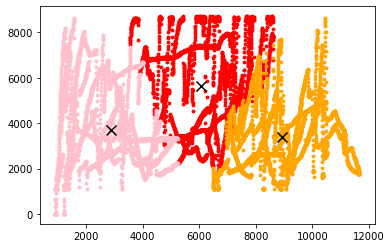

In [11]:
#Get the label of each sample of the trained object
import matplotlib.pyplot as plt
y_pred = cluster.labels_
#pd.DataFrame(y_pred).to_csv('labels.csv')
color=['red','pink','orange','gray']
fig, axi1=plt.subplots(1)
for i in range(n_clusters):
    axi1.scatter(data[y_pred==i, 0], data[y_pred==i, 1],
               marker='o',
               s=8,
               c=color[i])
axi1.scatter(centroid[:,0],centroid[:,1],marker='x',s=100,c='black')
plt.savefig('k_means_labels.jpg',dpi=300)

In [12]:
##Save the whole data and write to the k-means tag
y_preddf = pd.DataFrame(y_pred)
save_data['K-means_label']=y_preddf
save_data.to_csv('kmeans_data.csv')
save_data

,Headway_Distance,RPM,Gear,Throttle,Brake,Steering,Position_X,Position_Y,Velocity,Pre_Velocity,Driver,Road,K-means_label
0,1222.438379,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.0000,1,0,1
1,1222.421659,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.2050,1,0,1
2,1222.364747,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.2138,1,0,1
3,1222.339405,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.1526,1,0,1
4,1222.309433,0.000,0.0,0.000,0.0,0.006,1190.092,252.037,0.0000,0.1412,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14317,8945.974215,4461.470,1.0,0.403,0.0,-0.010,7895.768,4121.811,9.1720,12.3758,2,1,2
14318,8948.197211,4596.360,1.0,0.478,0.0,-0.010,7896.887,4123.303,9.4620,12.7281,2,1,2
14319,8950.592410,4756.560,1.0,0.515,0.0,-0.010,7898.044,4124.845,9.7934,13.8500,2,1,2
14320,8953.165203,4980.337,1.0,0.626,0.0,-0.012,7899.250,4126.450,10.2576,14.7060,2,1,2


### 3.1 PCA

x shape:(14322, 10)    x_transform shape:(14322, 10)


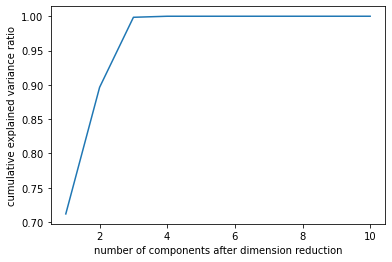

In [13]:
from sklearn.decomposition import PCA
X=copy_data.iloc[:,:10]
pca = PCA() #initialization
pca = pca.fit(X) 
X_reduced = pca.transform(X) # Get new matrix
print('x shape:'+ str(X.shape) +'    x_transform shape:'+ str(X_reduced.shape)) 

#  Number of features for optimal dimension reduction in PCA
plt.plot(np.arange(1,11,1),np.cumsum(pca.explained_variance_ratio_))
plt.xticks() # [1,2,3,4]
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.savefig('best_feture.jpg',dpi=300)
plt.show()

x shape:(14322, 13)    x_transform shape:(14322, 13)


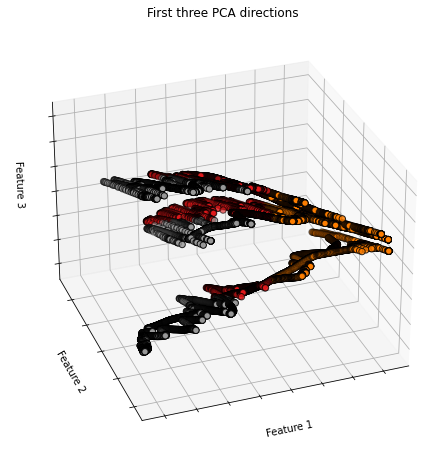

In [14]:
from mpl_toolkits.mplot3d import Axes3D
X=copy_data
n=3 # number of 3 pivot elements
pca = PCA() 
pca = pca.fit(X) 
X_reduced = pca.transform(X) # Obtain dimensionality reduction data
print('x shape:'+ str(X.shape) +'    x_transform shape:'+ str(X_reduced.shape)) 

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_pred,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("Feature 1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Feature 2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Feature 3")
ax.w_zaxis.set_ticklabels([])
plt.savefig('3D.jpg',dpi=300)
plt.show()

## 4. Build data set 

In [15]:
def normalization(X_train, X_val, X_test, type = 'min-max'):
    if type == 'min-max':
        for i in range(len(X_train[0,0])):
            train_min, train_max = X_train[:,0,i].min(),X_train[:,0,i].max() 
            X_train[:,0,i] = (X_train[:,0,i] - train_min)/(train_max - train_min)
            X_val[:,0,i] = (X_val[:,0,i] - train_min)/(train_max - train_min)
            X_test[:,0,i] = (X_test[:,0,i] - train_min)/(train_max - train_min)
    elif type == 'standardization':
        for i in range(len(X_train[0,0])):
            train_mean, train_std = X_train[:,0,i].mean(),X_train[:,0,i].std() 
            X_train[:,0,i] = (X_train[:,0,i] - train_mean)/train_std
            X_val[:,0,i] = (X_val[:,0,i] - train_mean)/train_std
            X_test[:,0,i] = (X_test[:,0,i] - train_mean)/train_std
    return X_train, X_val, X_test

In [16]:
shape=20
train_per=0.7
val_per=0.2
test_per=0.1

datas=data
data_list=[]
Labels=[]
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]
X_val=[]
Y_val=[]
ans=[]

divisions = int(len(datas)/shape)
datas = datas[:divisions * shape]
for i in range(divisions):
    data_list.append(datas[shape * (i):shape * (i+1)])       #features
    Labels.append(y_pred[shape * (i):shape * (i+1)])         # label
    driver=copy_data.iloc[i*shape,10]
    road=copy_data.iloc[i*shape,11]
    ans.append([driver,road])  
ans = np.asarray(ans)

value = (np.sum(Labels, axis=1)/shape).astype(int)
train_split_index = int(train_per * len(data_list))
val_split_index = int(val_per * len(data_list)) + train_split_index

# Return - the training set, validation set and test set
X_train.extend(data_list[: train_split_index])
X_train = np.asarray(X_train)
X_val.extend(data_list[train_split_index:val_split_index])
X_val = np.asarray(X_val)
X_test.extend(data_list[val_split_index:])
X_test = np.asarray(X_test)

Y_train=value[: train_split_index]
Y_val=value[train_split_index:val_split_index]
Y_test=value[val_split_index:]
Y_train = np.hstack((ans[: train_split_index], Y_train[:,np.newaxis])) #The cell can only be run once, and an error will be reported if it is run a second time
Y_val = np.hstack((ans[train_split_index:val_split_index], Y_val[:,np.newaxis]))  #The cell can only be run once, and an error will be reported if it is run a second time
Y_test = np.hstack((ans[val_split_index:], Y_test[:,np.newaxis]))  #The cell can only be run once, and an error will be reported if it is run a second time
#Normalization
X_train, X_val, X_test = normalization(X_train, X_val, X_test, type = 'min-max') # min-max
#Disorder
all_data = np.append(X_train,X_val,axis=0)
all_data= np.append(all_data,X_test,axis=0)
all_label=np.append(Y_train,Y_val,axis=0)
all_label=np.append(all_label,Y_test,axis=0)
indices = np.arange(all_data.shape[0])
np.random.shuffle(indices)
all_data = all_data[indices]
all_label = all_label[indices]
#The disrupted data is divided into a training set, a validation set and a test set
X_train=all_data[: train_split_index]
X_val=all_data[train_split_index:val_split_index]
X_test=all_data[val_split_index:]
Y_train=all_label[: train_split_index]
Y_val=all_label[train_split_index:val_split_index]
Y_test=all_label[val_split_index:]

print('X_train:'+str(X_train.shape)+'   Y_train:'+str(Y_train.shape)  )
print('X_val:'+str(X_val.shape)+ '  Y_val:'+str(Y_val.shape))
print('X_test:'+str(X_test.shape)+ '  Y_test:'+str(Y_test.shape))

X_train:(501, 20, 10)   Y_train:(501, 3)
X_val:(143, 20, 10)  Y_val:(143, 3)
X_test:(72, 20, 10)  Y_test:(72, 3)


## 5. Model training and parameter setting

In [2]:
def my_model_cnn(ishape = (1,7), k = 3, lr = 1e-4, drop_out = 0.1, weight_decay = 1e-4):
    model_input = tf.keras.layers.Input(shape = ishape)
    l1 = tf.keras.layers.Conv1D(32, 2, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(model_input)
    l1_batch = tf.keras.layers.BatchNormalization()(l1)
    l2 = tf.keras.layers.Conv1D(32, 2, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l1_batch)
    l2_batch = tf.keras.layers.BatchNormalization()(l2)
    l2_drop = tf.keras.layers.Dropout(drop_out)(l2_batch)
    l3 = tf.keras.layers.MaxPool1D(padding='same')(l2_drop)

    l4 = tf.keras.layers.Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l3)
    l4_batch = tf.keras.layers.BatchNormalization()(l4)
    l5 = tf.keras.layers.Conv1D(64, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l4_batch)
    l5_batch = tf.keras.layers.BatchNormalization()(l5)
    l5_drop = tf.keras.layers.Dropout(2*drop_out)(l5_batch)
    l6 = tf.keras.layers.MaxPool1D(padding='same')(l5_drop)

    l7 = tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l6)
    l7_batch = tf.keras.layers.BatchNormalization()(l7)
    l8 = tf.keras.layers.Conv1D(128, 3, padding='same', activation='relu', kernel_regularizer=tf.keras.regularizers.l2(weight_decay))(l7_batch)
    l8_batch = tf.keras.layers.BatchNormalization()(l8)
    l8_drop = tf.keras.layers.Dropout(3*drop_out)(l8_batch)
    l9 = tf.keras.layers.MaxPool1D(padding='same')(l8_drop)

    flat = tf.keras.layers.Flatten()(l9)
    out = tf.keras.layers.Dense(k, activation = 'softmax')(flat)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    opt_rms = tf.keras.optimizers.RMSprop(lr=lr,decay=1e-6)
    model.compile(optimizer=opt_rms, loss='categorical_crossentropy', metrics = ["accuracy", f1])
    
    return model

def callbacks(name):
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience =150)

    monitor = tf.keras.callbacks.ModelCheckpoint(name, monitor='val_loss',\
                                                verbose=0,save_best_only=True,\
                                                save_weights_only=True,\
                                                mode='min')
    # Learning rate schedule
    def scheduler(epoch, lr):
        if epoch%60 == 0:
            lr = lr/2
        return lr

    lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)
    
    return early_stop, monitor, lr_schedule

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
        predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+tf.keras.backend.epsilon()))

In [ ]:
# Save the training model name
model_name_cnn_batched = "team_4_CNN_batched.h5"
# Instantiating the model
import tensorflow as tf
model_CNN_batched = my_model_cnn(ishape=(len(X_train[0]), len(X_train[0,0])))
# Early stop setting
early_stop, monitor, lr_schedule = callbacks(model_name_cnn_batched)
# Print parameters
print(model_CNN_batched.summary())

In [1]:
# Start training
history_CNN_batched = model_CNN_batched.fit(    
    X_train, 
    Y_train, 
    batch_size = 32, 
    epochs = 1000, 
    verbose = 1, 
    callbacks=[early_stop, monitor, lr_schedule], 
    validation_data = (X_val, Y_val)
)

NameError: name 'model_CNN_batched' is not defined

In [ ]:
### Plotting the results of the training process
model_CNN_batched.load_weights(model_name_cnn_batched)
loss_cnn_batched = model_CNN_batched.evaluate(X_test, Y_test, verbose=0)
print('Final loss (cross-entropy and accuracy and F1):',loss_cnn_batched)

plt.plot(history_CNN_batched.history['loss'], label = "Train loss")
plt.plot(history_CNN_batched.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.savefig('Loss.jpg',dpi=300)
plt.show()


plt.plot(history_CNN_batched.history['accuracy'], label = "Train accuarcy")
plt.plot(history_CNN_batched.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.savefig('Accuracy.jpg',dpi=300)
plt.show()

plt.plot(history_CNN_batched.history['f1'], label = "Train F1")
plt.plot(history_CNN_batched.history['val_f1'], label = "Val F1")
plt.xlabel("Epoch (iteration)")
plt.ylabel("F1")
plt.legend()
plt.grid()
plt.savefig('F1-score.jpg',dpi=300)
plt.show()